基於dataset\training_set數據，根據提供的結構建立CNN模型，識別圖片中的貓/狗，計算預測準確率:
1. 識別圖片中的貓/狗、計算dataset\training_set測試數據預測準確率
1. 從網站下載貓/狗，對其進行預測

In [1]:
# load the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=15, # 旋转范围
#                                    shear_range=0.2, # 剪切强度
#                                    zoom_range=0.2, # 缩放范围
#                                    width_shift_range=0.2, # 水平平移范围
#                                    height_shift_range=0.2, # 垂直平移范围
#                                    horizontal_flip=True, # 水平反转
#                                    vertical_flip=True # 垂直翻转
                                  )

                                  

training_set = train_datagen.flow_from_directory('./dataset/training_set',
                                                 target_size=(50,50), # 所有的图像将被调整到的統一尺寸
                                                 batch_size=32, # 一次拿幾張圖片
#                                                  save_to_dir='./dataset/save_data', # 指定正在生成的增强图片要保存的目录（用于可视化你在做什么）
#                                                  save_prefix='trans_', # 保存图片的文件名前缀
#                                                  save_format='jpeg', # "png", "jpeg" 之一。默认："png"。
                                                 class_mode='binary'
                                                )

Found 1800 images belonging to 2 classes.


In [2]:
# set up the cnn model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model = Sequential()
# 捲積層
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))
# 池化層
model.add(MaxPool2D(pool_size=(2,2)))
# 捲積層
model.add(Conv2D(32,(3,3),activation='relu'))
# 池化層
model.add(MaxPool2D(pool_size=(2,2)))
# flattening layer
model.add(Flatten())
# FC layer
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [3]:
# configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               4

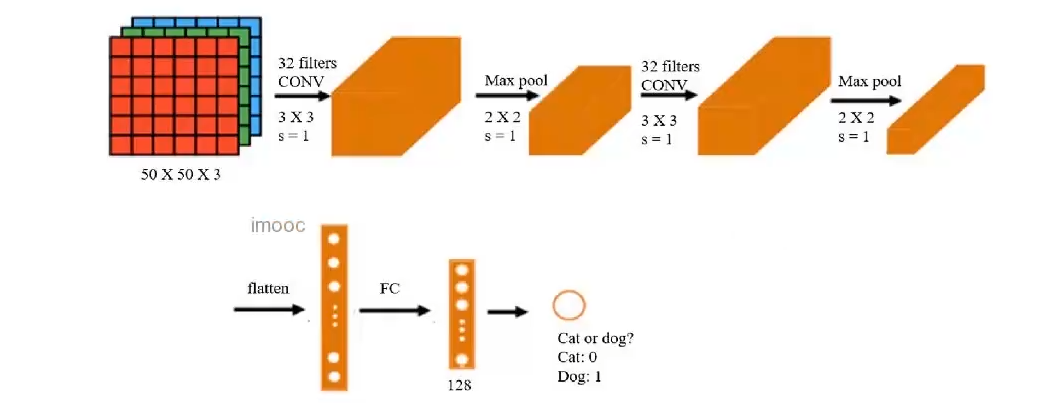

In [5]:
# train the model
model.fit_generator(training_set,epochs=25)

Epoch 1/25


E:\python\anaconda3\envs\tets\lib\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


57/57 [==============================] - 8s 120ms/step - loss: 0.6955 - accuracy: 0.5344
Epoch 2/25
57/57 [==============================] - 7s 120ms/step - loss: 0.6455 - accuracy: 0.6433
Epoch 3/25
57/57 [==============================] - 7s 119ms/step - loss: 0.6167 - accuracy: 0.6694
Epoch 4/25
57/57 [==============================] - 7s 122ms/step - loss: 0.5596 - accuracy: 0.7211
Epoch 5/25
57/57 [==============================] - 7s 122ms/step - loss: 0.5147 - accuracy: 0.7428
Epoch 6/25
57/57 [==============================] - 7s 122ms/step - loss: 0.4462 - accuracy: 0.7939
Epoch 7/25
57/57 [==============================] - 7s 122ms/step - loss: 0.3929 - accuracy: 0.8206
Epoch 8/25
57/57 [==============================] - 7s 122ms/step - loss: 0.3739 - accuracy: 0.8294
Epoch 9/25
57/57 [==============================] - 7s 126ms/step - loss: 0.2847 - accuracy: 0.8872
Epoch 10/25
57/57 [==============================] - 7s 120ms/step - loss: 0.2369 - accuracy: 0.9117
Epoch 11/2

In [6]:
# accuracy on the training data
accuracy_train = model.evaluate_generator(training_set)
print(accuracy_train)

E:\python\anaconda3\envs\tets\lib\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.021801849827170372, 0.995555579662323]


In [7]:
# accuracy on the test data
test_set = train_datagen.flow_from_directory('./dataset/test_set',target_size=(50,50),batch_size=32,class_mode='binary')

accuracy_test = model.evaluate_generator(test_set)
print(accuracy_test)

Found 800 images belonging to 2 classes.


E:\python\anaconda3\envs\tets\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[1.6985275745391846, 0.6399999856948853]


In [8]:
# load single image
from keras.utils.image_utils import load_img,img_to_array
pic_cat = './dataset/test_set/cat/cat.273.jpg'
pic_cat = load_img(pic_cat,target_size=(50,50))
pic_cat= img_to_array(pic_cat)
pic_cat = pic_cat/255
pic_cat = pic_cat.reshape(1,50,50,3)
import numpy as np
result = np.around(model.predict(pic_cat))
print(result)

1/1 [==============================] - 0s 93ms/step
[[1.]]


In [9]:
# load single image
from keras.utils.image_utils import load_img,img_to_array
pic_dog = './dataset/test_set/dog/dog.398.jpg'
pic_dog = load_img(pic_dog,target_size=(50,50))
pic_dog= img_to_array(pic_dog)
pic_dog = pic_dog/255
pic_dog = pic_dog.reshape(1,50,50,3)
import numpy as np
result = np.around(model.predict(pic_dog))
print(result)

1/1 [==============================] - 0s 18ms/step
[[1.]]


In [10]:
training_set.class_indices # 看屬於哪個類別

{'cat': 0, 'dog': 1}

1/1 [==============================] - 0s 18ms/step


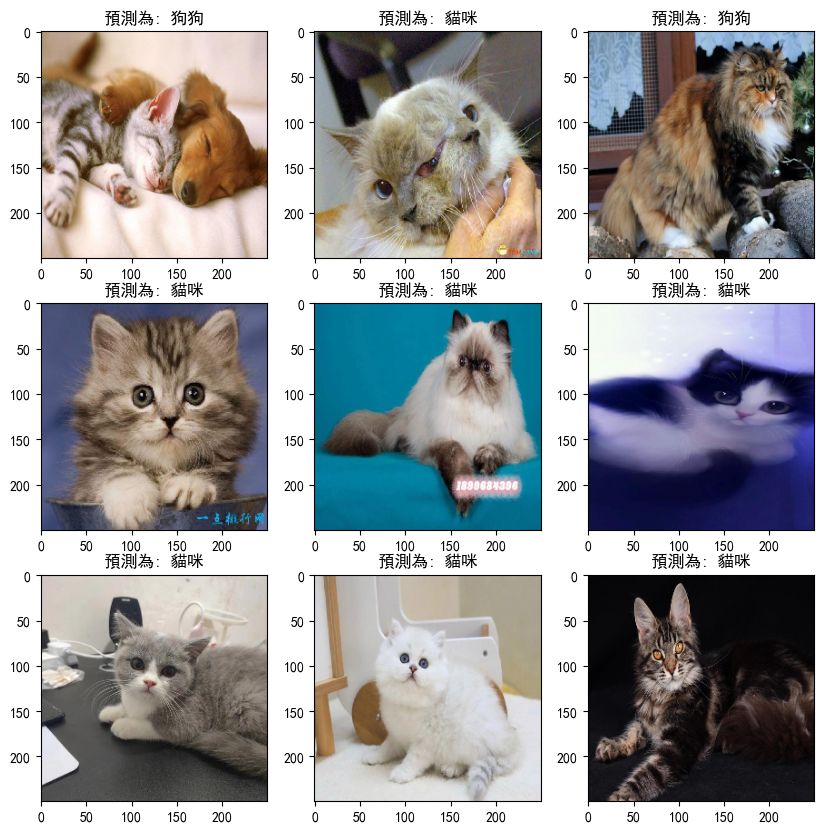

In [11]:
# make prediction on multiple images
# 多張圖片的預測
import matplotlib as mlp
font2 = {
    'family': 'SimHei',
    'weiight': 'normal',
    'size': 20
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils.image_utils import load_img, img_to_array
from keras.models import load_model

fig = plt.figure(figsize=(10,10))
a = [i for i in range(1,10)]
for i in a:
    img_name = './dataset/test_set/cat/cat.{i}.jpg'.format(i=i)
    img_ori = load_img(img_name,target_size=(50,50))
    img = img_to_array(img_ori)
    img = img.astype('float32') / 255
    img = img.reshape(1,50,50,3)
    result = np.around(model.predict(img))
    img_ori = load_img(img_name,target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('預測為: 狗狗' if result[0][0] == 1 else '預測為: 貓咪')
plt.show()

CNN實現貓狗識別實戰summary:
1. 通過搭建CNN模型，實現了對複雜圖像的自動識別分類
1. 掌握了圖像數據的批量加載與圖像增强方法
1. 更熟練的掌握了keras的sequence結構，並嵌入捲積層、池化層
1. 實現了對網絡圖片的分類識別
1. 圖像預處理參考資料: 
- https://keras.io/api/preprocessing/image/
- https://keras.io/zh/preprocessing/image/